<a href="https://colab.research.google.com/github/afarsaee/Hafiz/blob/main/Hafez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
read_Beyts = []
with open('Beyts.txt', 'r',encoding="utf-8") as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]

        # add item to the list
        read_Beyts.append(currentPlace)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(read_Beyts)
total_words = len(tokenizer.word_index) + 1
# create input sequences using list of tokens
input_sequences = []
for line in read_Beyts:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.5))
model.add(LSTM(100))
#model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words/2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(total_words, activation='softmax'))
opt = Adam(learning_rate=0.003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())
#BUFFER_SIZE = 10000
#BATCH_SIZE = 64

#train_dataset = train_data.shuffle(BUFFER_SIZE)
#train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
#test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 12, 64)            505344    
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 12, 300)           258000    
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 300)           0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_34 (Dense)             (None, 3948)              398748    
_________________________________________________________________
batch_normalization_17 (Batc (None, 3948)              15792     
_________________________________________________________________
dense_35 (Dense)             (None, 7896)            

In [ ]:
n_batch = int(len(predictors)/70)

In [ ]:
 history = model.fit(predictors, label, epochs=100,  batch_size=n_batch, verbose=1)

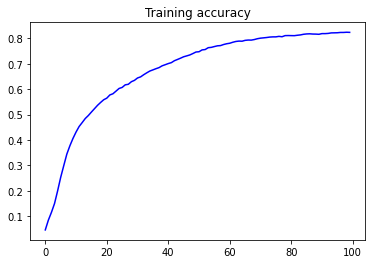

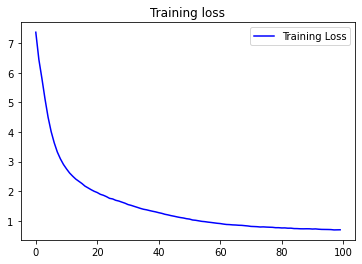

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "وطن"
print(seed_text)
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #print(token_list)
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
# later...
 # if you want to load the model:

# load json and create model
  #json_file = open('model.json', 'r')
  #loaded_model_json = json_file.read()
  #json_file.close()
  #loaded_model = model_from_json(loaded_model_json)
# load weights into new model
  #loaded_model.load_weights("model.h5")
  #print("Loaded model from disk")